# REINFORCEMENT LEARNING WITH Q-LEARNING AND SARSA

## SETUP

In [19]:
import os
import sys
import pandas as pd
from copy import deepcopy

pd.set_option("display.max_columns", None)

# Add the parent directory (where "modules" is located) to the Python path
notebook_dir = os.getcwd()
parent_dir = os.path.dirname(notebook_dir)
sys.path.append(parent_dir)

from modules import environment_creation_functions as ecf
from modules import environment as env
from modules import learners as learn
from modules import environment_agent_execution as eae

## LOAD ENVIRONMENT

Initial state of the agent is represented in green color, the final or destination state in red and barrier in black.

Creating maze
Grid of: 9 x 9
Barriers count: 20
Source: (3, 0)
Destination: (3, 8)
Path to destination found.


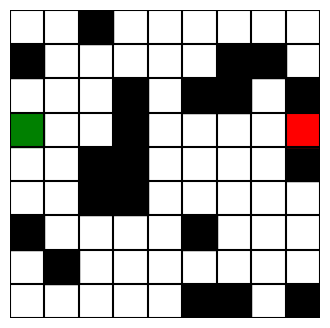

In [23]:
# create environment
dim, grid_matrix_positions, barriers, src, dest, reward_matrix  = ecf.create_environment(False, 4, 20)
environment = env.Environment(reward_matrix, list(src), list(dest)) # convert states from tuple into list

# visualize created environment
%matplotlib inline
ecf.visualize_environment(dim, barriers, src, dest)

## REINFORCEMENT LEARNING RULES

- **Penalty for Each Step**: -1
- **Penalty for Hitting a Barrier** (Black Boxes): -30
- **Penalty for Moving Out of Bounds**: -50

### Q-LEARNER ALGORITHM

- Algorithm pseudocode:

   ```
   Q(,) = 0 # Policy Initialization
   For each episode do:
        s = initial state
        For each step, state s (not final) do:
            a = Choose action. Cases:
                - random(action) if random() <= exploration_rate 
                - max_a Q(s,)  if random() > exploration_rate  
            Execute action a
            s = s' # New state
            R(s, a) = reward
            Q(s, a)' = Q(s, a) + alpha[R(s, a) + (gamma . max_a'Q(s', a')) - Q(s, a)]       
        end
    end
    ```

#### SHORT-TERM FOCUS

In [24]:
# apply agent learning
episodes_list, best_episode, src = eae.agent_learning(learner=learn.QLearner, # Learning algorithm
                                        environment = deepcopy(environment),  # Agent environment.
                                        num_episodes=30,
                                        learning_rate=0.1,
                                        discount_factor=0.1,    # Near 0, learn to move to the next most rewarding state
                                        ratio_exploration=0.05, # Greedy control: Explore 5% of time and explote %95 of time
                                        verbose=True)

# print learning process
eae.print_process_info(best_episode=best_episode, start_point = src)

EPISODE 1 - Actions: 282 - Reward: -2872.0
EPISODE 2 - Actions: 56 - Reward: -422.0
EPISODE 3 - Actions: 178 - Reward: -522.0
EPISODE 4 - Actions: 150 - Reward: -464.0
EPISODE 5 - Actions: 90 - Reward: 10.0
EPISODE 6 - Actions: 225 - Reward: -234.0
EPISODE 7 - Actions: 197 - Reward: -176.0
EPISODE 8 - Actions: 197 - Reward: -206.0
EPISODE 9 - Actions: 122 - Reward: -210.0
EPISODE 10 - Actions: 289 - Reward: -366.0
EPISODE 11 - Actions: 152 - Reward: -172.0
EPISODE 12 - Actions: 178 - Reward: -78.0
EPISODE 13 - Actions: 142 - Reward: -42.0
EPISODE 14 - Actions: 152 - Reward: -82.0
EPISODE 15 - Actions: 334 - Reward: -234.0
EPISODE 16 - Actions: 117 - Reward: -156.0
EPISODE 17 - Actions: 204 - Reward: -164.0
EPISODE 18 - Actions: 240 - Reward: -170.0
EPISODE 19 - Actions: 66 - Reward: 34.0
EPISODE 20 - Actions: 294 - Reward: -254.0
EPISODE 21 - Actions: 46 - Reward: 54.0
EPISODE 22 - Actions: 184 - Reward: -144.0
EPISODE 23 - Actions: 205 - Reward: -184.0
EPISODE 24 - Actions: 46 - Rewar

#### LONG-TERM FOCUS

In [26]:
# apply agent learning
episodes_list, best_episode, src= eae.agent_learning(learner=learn.QLearner, # Learning algorithm
                                        environment = deepcopy(environment), # Agent environment
                                        num_episodes=30,
                                        learning_rate=0.1,
                                        discount_factor=0.9,    # Near 1, move with a view to maximizing the final reward
                                        ratio_exploration=0.05, # Greedy control: Explore 5% of time and explote %95 of time
                                        verbose=True)
# print learning process
eae.print_process_info(best_episode=best_episode, start_point = src)

EPISODE 1 - Actions: 337 - Reward: -2330.0
EPISODE 2 - Actions: 113 - Reward: -468.0
EPISODE 3 - Actions: 125 - Reward: -202.0
EPISODE 4 - Actions: 97 - Reward: -700.0
EPISODE 5 - Actions: 112 - Reward: -12.0
EPISODE 6 - Actions: 157 - Reward: -166.0
EPISODE 7 - Actions: 124 - Reward: -152.0
EPISODE 8 - Actions: 42 - Reward: 58.0
EPISODE 9 - Actions: 60 - Reward: -50.0
EPISODE 10 - Actions: 112 - Reward: -102.0
EPISODE 11 - Actions: 50 - Reward: -10.0
EPISODE 12 - Actions: 121 - Reward: -130.0
EPISODE 13 - Actions: 81 - Reward: -90.0
EPISODE 14 - Actions: 134 - Reward: -34.0
EPISODE 15 - Actions: 38 - Reward: 62.0
EPISODE 16 - Actions: 70 - Reward: 30.0
EPISODE 17 - Actions: 73 - Reward: -22.0
EPISODE 18 - Actions: 77 - Reward: -26.0
EPISODE 19 - Actions: 110 - Reward: -100.0
EPISODE 20 - Actions: 22 - Reward: 48.0
EPISODE 21 - Actions: 41 - Reward: 10.0
EPISODE 22 - Actions: 73 - Reward: -112.0
EPISODE 23 - Actions: 86 - Reward: -144.0
EPISODE 24 - Actions: 50 - Reward: 50.0
EPISODE 2

### SARSA ALGORITHM

- Algorithm pseudocode:

   ```
   Q(,) = 0 # Policy Initialization
   For each episode do:
        s = initial state
        For each step, state s (not final) do:
            a = Choose action. Cases:
                - random(action) if random() <= exploration_rate 
                - max_a Q(s,)  if random() > exploration_rate  
            Execute action a
            s = s' # New state
            R(s, a) = reward
            a' = Choose new action. Cases:
                - random(action) if random() <= exploration_rate 
                - max_a' Q(s',)  if random() > exploration_rate   
            Q(s, a)' = Q(s, a) + alpha[R(s, a) + (gamma . Q(s', a')) - Q(s, a)]       
        end
    end
    ```

#### SHORT-TERM FOCUS

In [27]:
# apply agent learning
episodes_list, best_episode, src = eae.agent_learning(learner=learn.SARSALearner, # Learning algorithm
                                        environment = deepcopy(environment),  # Agent environment.
                                        num_episodes=30,
                                        learning_rate=0.1,
                                        discount_factor=0.1,    # Near 0, learn to move to the next most rewarding state
                                        ratio_exploration=0.05, # Greedy control: Explore 5% of time and explote %95 of time
                                        verbose=True)

# print learning process
eae.print_process_info(best_episode=best_episode, start_point = src)

EPISODE 1 - Actions: 118 - Reward: -1220.0
EPISODE 2 - Actions: 355 - Reward: -2484.0
EPISODE 3 - Actions: 232 - Reward: -380.0
EPISODE 4 - Actions: 139 - Reward: -404.0
EPISODE 5 - Actions: 244 - Reward: -302.0
EPISODE 6 - Actions: 58 - Reward: 12.0
EPISODE 7 - Actions: 238 - Reward: -168.0
EPISODE 8 - Actions: 62 - Reward: 38.0
EPISODE 9 - Actions: 340 - Reward: -564.0
EPISODE 10 - Actions: 182 - Reward: -142.0
EPISODE 11 - Actions: 228 - Reward: -188.0
EPISODE 12 - Actions: 206 - Reward: -264.0
EPISODE 13 - Actions: 203 - Reward: -280.0
EPISODE 14 - Actions: 172 - Reward: -132.0
EPISODE 15 - Actions: 100 - Reward: -98.0
EPISODE 16 - Actions: 200 - Reward: -130.0
EPISODE 17 - Actions: 26 - Reward: 74.0
EPISODE 18 - Actions: 141 - Reward: -120.0
EPISODE 19 - Actions: 162 - Reward: -152.0
EPISODE 20 - Actions: 308 - Reward: -516.0
EPISODE 21 - Actions: 167 - Reward: -146.0
EPISODE 22 - Actions: 82 - Reward: 18.0
EPISODE 23 - Actions: 78 - Reward: -38.0
EPISODE 24 - Actions: 30 - Reward

#### LONG-TERM FOCUS

In [28]:
# apply agent learning
episodes_list, best_episode, src= eae.agent_learning(learner=learn.SARSALearner, # Learning algorithm
                                        environment = deepcopy(environment), # Agent environment
                                        num_episodes=30,
                                        learning_rate=0.1,
                                        discount_factor=0.9,    # Near 1, move with a view to maximizing the final reward
                                        ratio_exploration=0.05, # Greedy control: Explore 5% of time and explote %95 of time
                                        verbose=True)
# print learning process
eae.print_process_info(best_episode=best_episode, start_point = src)

EPISODE 1 - Actions: 169 - Reward: -1794.0
EPISODE 2 - Actions: 267 - Reward: -1720.0
EPISODE 3 - Actions: 84 - Reward: -450.0
EPISODE 4 - Actions: 78 - Reward: -8.0
EPISODE 5 - Actions: 301 - Reward: -370.0
EPISODE 6 - Actions: 20 - Reward: 50.0
EPISODE 7 - Actions: 150 - Reward: -50.0
EPISODE 8 - Actions: 51 - Reward: 0.0
EPISODE 9 - Actions: 64 - Reward: 6.0
EPISODE 10 - Actions: 291 - Reward: -330.0
EPISODE 11 - Actions: 60 - Reward: 40.0
EPISODE 12 - Actions: 68 - Reward: 32.0
EPISODE 13 - Actions: 56 - Reward: 44.0
EPISODE 14 - Actions: 82 - Reward: -12.0
EPISODE 15 - Actions: 88 - Reward: 12.0
EPISODE 16 - Actions: 49 - Reward: 2.0
EPISODE 17 - Actions: 64 - Reward: 36.0
EPISODE 18 - Actions: 49 - Reward: -58.0
EPISODE 19 - Actions: 70 - Reward: 0.0
EPISODE 20 - Actions: 14 - Reward: 86.0
EPISODE 21 - Actions: 36 - Reward: 34.0
EPISODE 22 - Actions: 84 - Reward: 16.0
EPISODE 23 - Actions: 76 - Reward: 24.0
EPISODE 24 - Actions: 54 - Reward: 46.0
EPISODE 25 - Actions: 61 - Reward